# Analítica Avanzada de Datos.
---
**Alumnos:**

-Maravilla Pérez Vianey

-Mondolla Cervantes Erin

-Ramírez Mendez Kevin

 FECHA DE ENTREGA: **Miercoles 12 de Abril**

## Práctica 2. Regresión Lineal


 Utilizando el dataset *Air Quality Dataset* (AirQualityUCI.csv) y cuya descripción es la siguiente:

El dataset contiene **9357** instancias de respuestas promediadas cada hora de un conjunto de *5 sensores químicos* de óxido metálico integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba situado sobre el terreno en una zona significativamente contaminada, a nivel de carretera, dentro de una ciudad italiana. Los datos se registraron de marzo de 2004 a febrero de 2005 (un año), lo que representa el periodo más largo de registros disponibles de respuestas de dispositivos de sensores químicos de calidad del aire desplegados sobre el terreno. Las concentraciones medias horarias reales de CO, hidrocarburos no metánicos, benceno, óxidos de nitrógeno (NOx) y dióxido de nitrógeno (NO2) fueron proporcionadas por un analizador certificado de referencia situado en el mismo lugar. Existen evidencias de sensibilidades cruzadas, así como de desviaciones del concepto y del sensor, tal como se describe en De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (cita requerida) afectando eventualmente a las capacidades de estimación de concentración de los sensores. Los **valores perdidos** se marcan con el valor **-200**.

https://archive.ics.uci.edu/ml/datasets/Air+quality

Sus atributos son:

0. Fecha (DD/MM/AAAA)
1. Hora (HH.MM.SS)
2. Concentración media horaria real de CO en mg/m^3 (analizador de referencia)
3. Respuesta media horaria del sensor PT08.S1 (óxido de estaño) (nominalmente dirigido a CO)
4. Promedio horario real de la concentración total de hidrocarburos no metánicos en microg/m^3 (analizador de referencia)
5. Concentración media horaria real de benceno en microg/m^3 (analizador de referencia)
6. Respuesta media horaria del sensor PT08.S2 (titania) (objetivo nominal NMHC)
7. Concentración de NOx media horaria real en ppb (analizador de referencia)
8. PT08.S3 (óxido de tungsteno) respuesta media horaria del sensor (objetivo nominal NOx)
9. Concentración de NO2 real media horaria en microg/m^3 (analizador de referencia)
10. PT08.S4 (óxido de tungsteno) respuesta media horaria del sensor (objetivo nominal NO2)
11. PT08.S5 (óxido de indio) respuesta media horaria del sensor (objetivo nominal O3)
12. Temperatura en Â°C
13. Humedad relativa (%)
14. AH Humedad absoluta

Utilizando este Dataset y los modelos de regresión vistos en la unidad, contesta la siguiente pregunta:
- **¿En que horarios se tiene la mayor contaminación del aire?**

1. Debes analizar:
    - Si existen valores perdidos
    - Elegir las características más apropiadas
    - Calcular la correlación estadística

2. Con base en tu análisis previo, entrena el modelo de regresión (hold out 70% - 30%)
3. Evalua tu modelo entrenado calculando:
    - MSE
    - RMSE
    - R-squared
4. Escribe una breve conclusión de los resultados de tu análisis completo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
df.shape

(9471, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [6]:
#Eliminamos las colmnas 'Unnamed'
df.drop(['Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [7]:
#Unificando el tipo de dato strings a floats

df.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [8]:
#En la descripción del dataset se especifica que los valores perdidos estan como -200, los reemplazaremos como valores nulos

df.replace(to_replace=-200, value=np.nan, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [10]:
#Eliminamos la columna NMHC(GT) por la gran cantidad de valores nulos que tiene

df.drop('NMHC(GT)', axis=1, inplace=True)

In [11]:
#Eliminamos los valores nulos de las demás columnas del dataset
features=df.dropna()

In [12]:
#Unificando el tipo de dato a tiempo de Date
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True) 

C:\Users\erin_\AppData\Local\Temp/ipykernel_53532/1277452029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)


In [13]:
features.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [14]:
features.shape

(6941, 14)

In [15]:
#Eliminamos las filas duplicadas
features.drop_duplicates(inplace= True)

C:\Users\erin_\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
#Verificar si hay valores duplicados o no
assert features.duplicated().sum() == 0

In [17]:
features.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


In [18]:
#Correlación
correlacion = features.corr()
correlacion

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.877014,0.930008,0.914310,0.786456,-0.701038,0.673840,0.630834,0.853480,0.018334,0.064753,0.059346
PT08.S1(CO),0.877014,1.000000,0.877430,0.886068,0.707705,-0.762895,0.628263,0.675910,0.897166,0.028277,0.169234,0.149752
C6H6(GT),0.930008,0.877430,1.000000,0.982705,0.718344,-0.725722,0.603241,0.761805,0.861154,0.189003,-0.021592,0.187072
PT08.S2(NMHC),0.914310,0.886068,0.982705,1.000000,0.705359,-0.781630,0.633310,0.774288,0.876777,0.228333,-0.046084,0.205590
NOx(GT),0.786456,0.707705,0.718344,0.705359,1.000000,-0.662166,0.757029,0.233793,0.788550,-0.275998,0.232255,-0.144186
PT08.S3(NOx),-0.701038,-0.762895,-0.725722,-0.781630,-0.662166,1.000000,-0.641377,-0.511223,-0.793364,-0.099495,-0.116479,-0.223381
NO2(GT),0.673840,0.628263,0.603241,0.633310,0.757029,-0.641377,1.000000,0.142612,0.702524,-0.214325,-0.075333,-0.349646
PT08.S4(NO2),0.630834,0.675910,0.761805,0.774288,0.233793,-0.511223,0.142612,1.000000,0.574242,0.566586,-0.009160,0.646390
PT08.S5(O3),0.853480,0.897166,0.861154,0.876777,0.788550,-0.793364,0.702524,0.574242,1.000000,-0.046146,0.164821,0.075807
T,0.018334,0.028277,0.189003,0.228333,-0.275998,-0.099495,-0.214325,0.566586,-0.046146,1.000000,-0.563909,0.660638


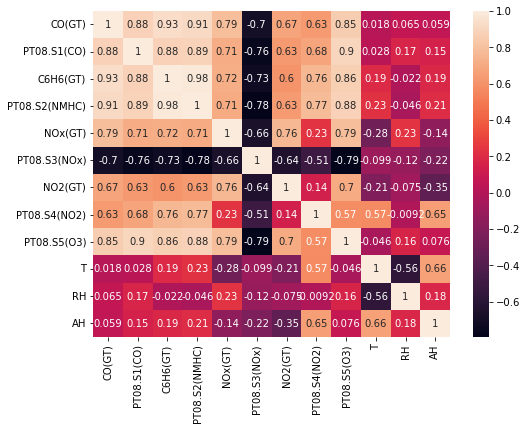

In [19]:
#Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True)
plt.show()

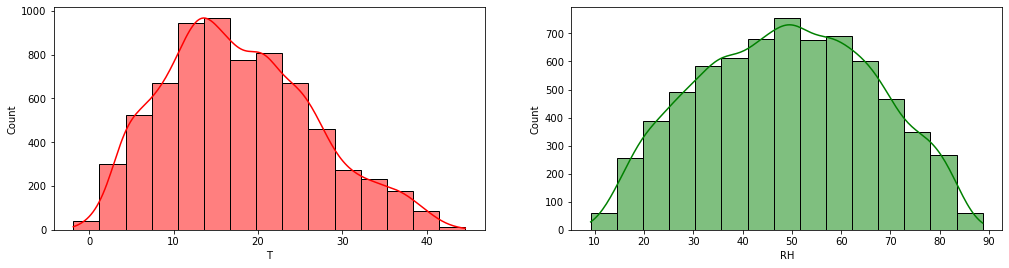

In [20]:
plt.figure(figsize=(17, 9))
plt.subplot(2, 2, 1)
sns.histplot(features["T"], stat="count", color="red", bins=15, kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(features.RH, stat="count", color = "green", bins=15, kde={'alpha':0.5})
plt.show()

<AxesSubplot:xlabel='AH', ylabel='Count'>

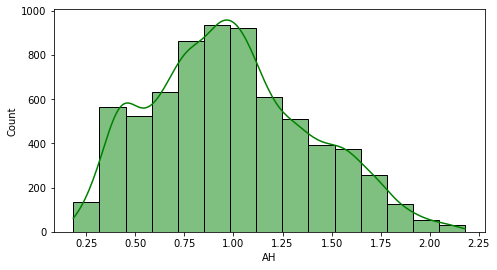

In [21]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(features.AH,stat="count",color="green",bins=15,kde={'alpha':0.5})

In [22]:
numeric_features = ['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

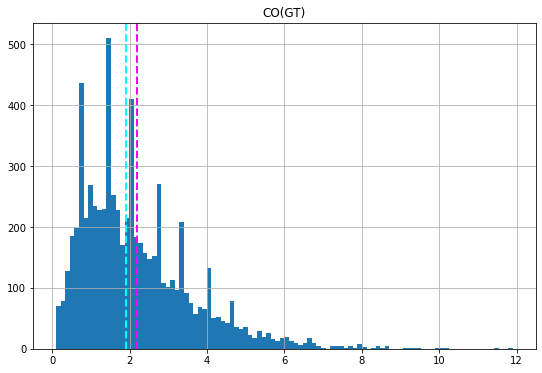

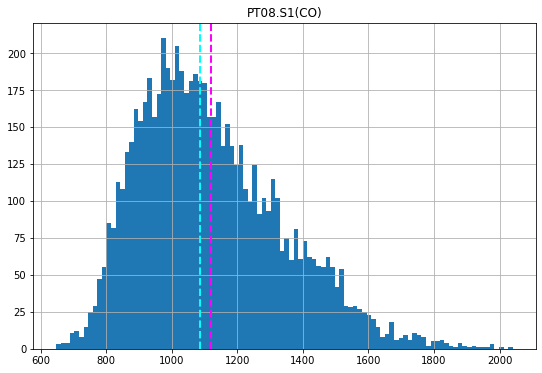

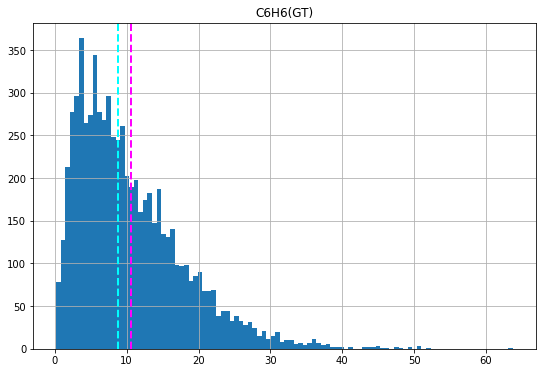

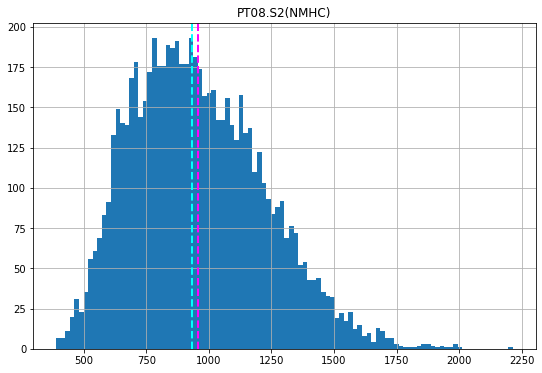

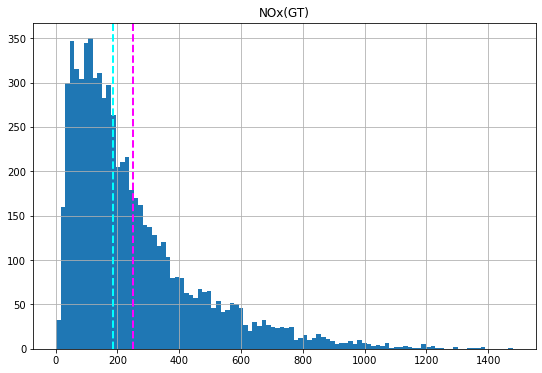

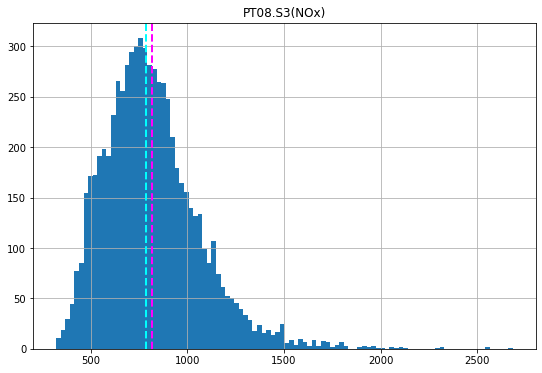

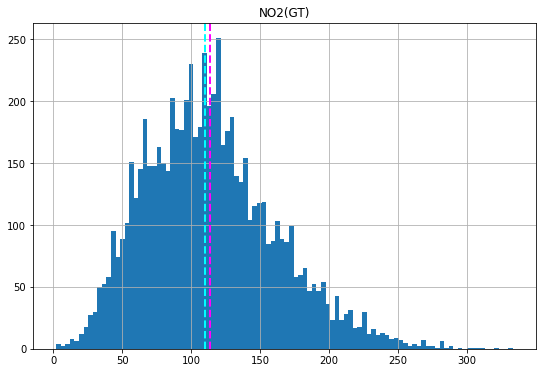

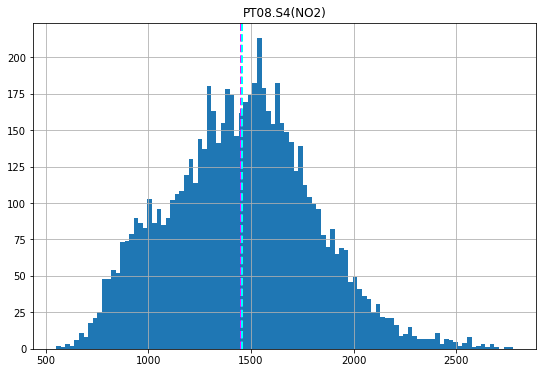

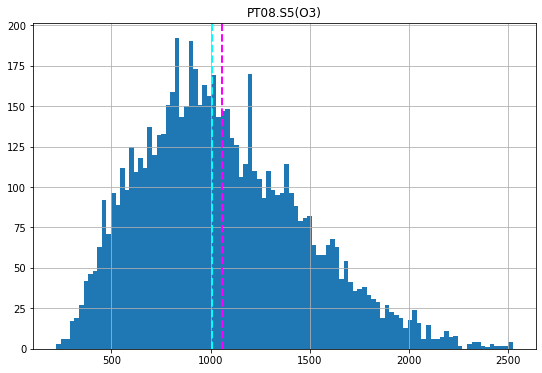

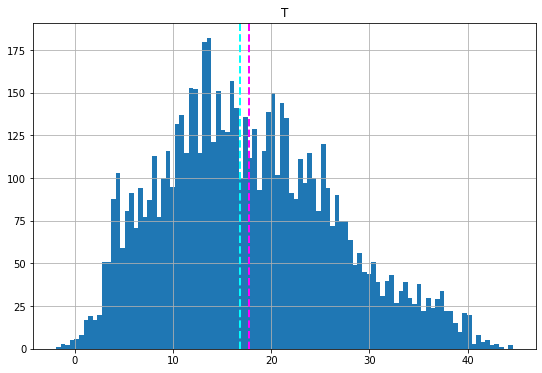

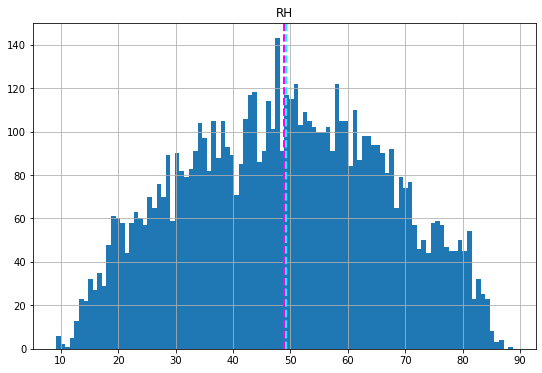

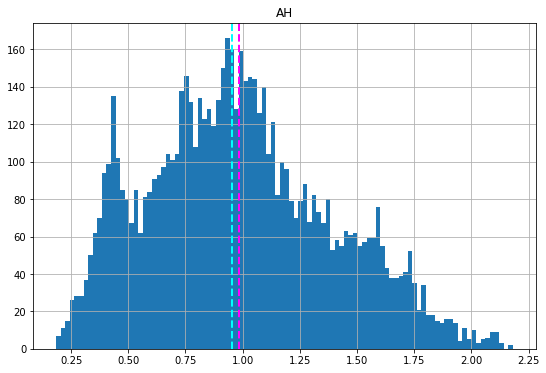

In [23]:
# Trazar un histograma para cada característica numérica
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = features[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [24]:
sns.set_theme(style="whitegrid")

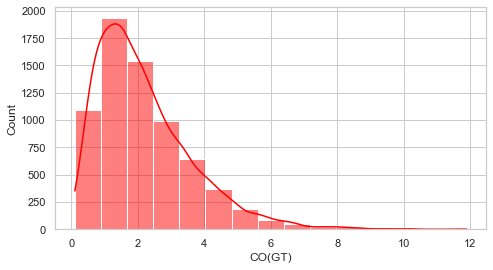

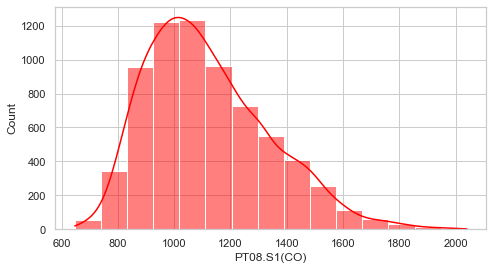

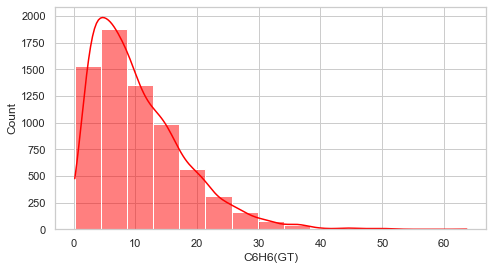

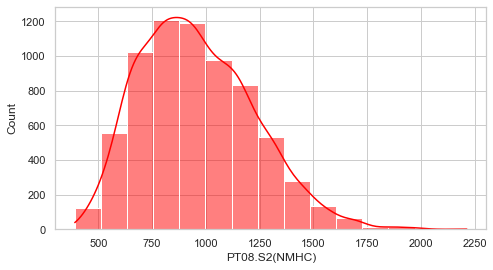

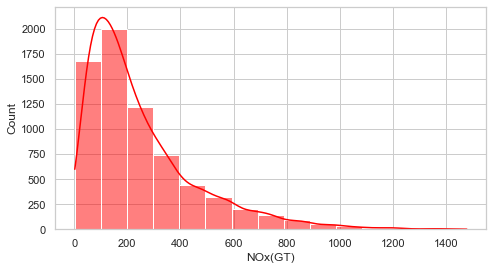

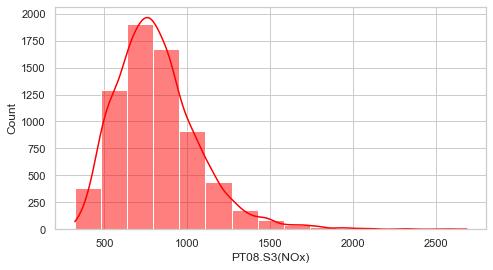

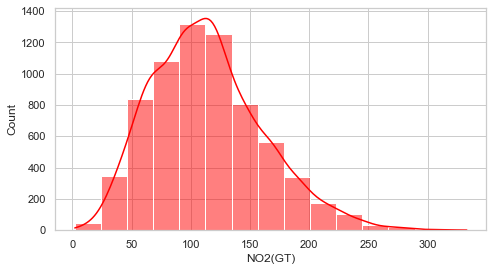

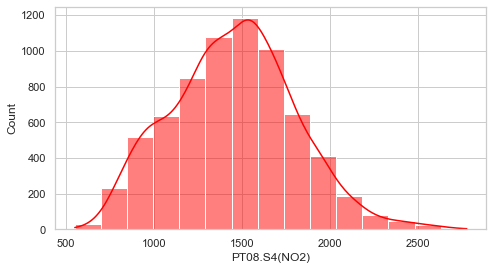

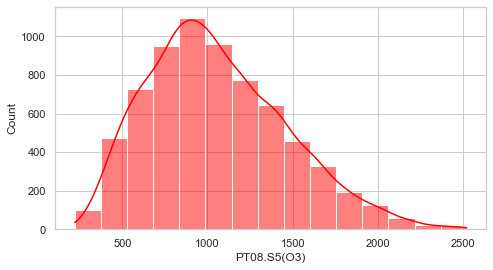

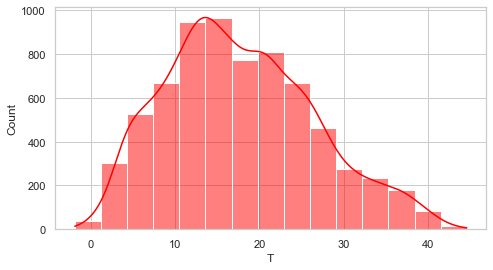

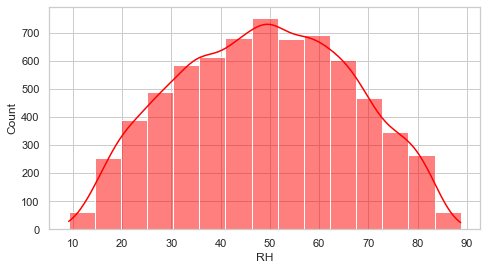

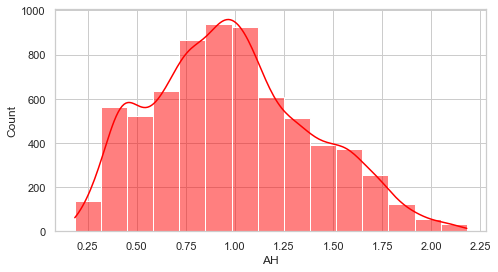

In [25]:
for i in features.columns[2:14]:
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.histplot(x=features[i],stat="count",color="red",bins=15,kde={'alpha':0.5})

In [26]:
#Eliminamos CO(GT), NOx(GT) y NO2(GT) por la cantidad de valores nulos

pd.options.mode.chained_assignment = None
features.drop(['CO(GT)','NOx(GT)','NO2(GT)'],axis=1, inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Time           6941 non-null   object        
 2   PT08.S1(CO)    6941 non-null   float64       
 3   C6H6(GT)       6941 non-null   float64       
 4   PT08.S2(NMHC)  6941 non-null   float64       
 5   PT08.S3(NOx)   6941 non-null   float64       
 6   PT08.S4(NO2)   6941 non-null   float64       
 7   PT08.S5(O3)    6941 non-null   float64       
 8   T              6941 non-null   float64       
 9   RH             6941 non-null   float64       
 10  AH             6941 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 650.7+ KB


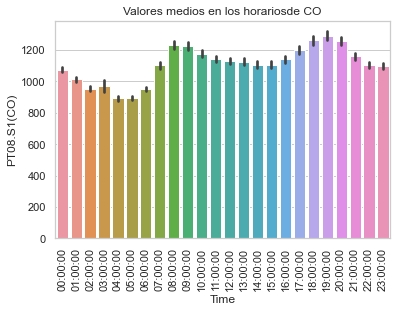

In [27]:
#Trazado del valor horario medio de CO (óxido de estaño)

sns.barplot(x='Time',y='PT08.S1(CO)', data=features.sort_values('Time'))
plt.title('Valores medios en los horariosde CO')
plt.xticks(rotation=90)
plt.show()

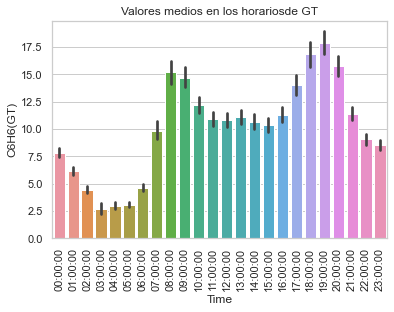

In [28]:
#Trazado del valor horario medio de GT (Benzeno)

sns.barplot(x='Time',y='C6H6(GT)', data=features.sort_values('Time'))
plt.title('Valores medios en los horariosde GT')
plt.xticks(rotation=90)
plt.show()

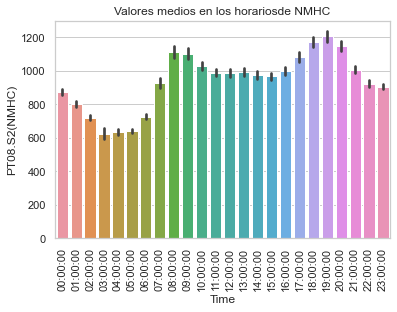

In [29]:
#Trazado del valor horario medio de NMHC

sns.barplot(x='Time',y='PT08.S2(NMHC)', data=features.sort_values('Time'))
plt.title('Valores medios en los horariosde NMHC')
plt.xticks(rotation=90)
plt.show()

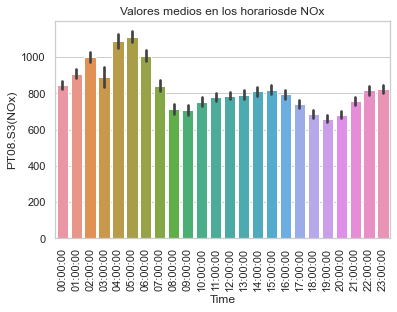

In [30]:
#Trazado del valor horario medio de NOx (Óxido de tungsteno)

sns.barplot(x='Time',y='PT08.S3(NOx)', data=features.sort_values('Time'))
plt.title('Valores medios en los horariosde NOx')
plt.xticks(rotation=90)
plt.show()

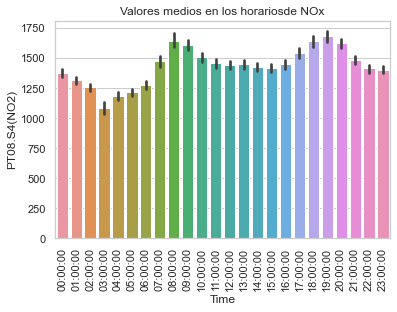

In [31]:
#Trazado del valor horario medio de NO2 (Óxido de tungsteno)

sns.barplot(x='Time',y='PT08.S4(NO2)', data=features.sort_values('Time'))
plt.title('Valores medios en los horariosde NOx')
plt.xticks(rotation=90)
plt.show()

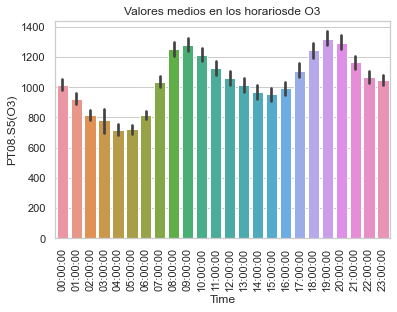

In [32]:
#Trazado del valor horario medio de O3 (Óxido de tungsteno)

sns.barplot(x='Time',y='PT08.S5(O3)', data=features.sort_values('Time'))
plt.title('Valores medios en los horariosde O3')
plt.xticks(rotation=90)
plt.show()

## Modelo de Regresión

Ya que se exploraron los datos podemos utilizarlos para predecir la concentración real de benceno promediada por hora en microg/m^3 **C6H6(GT)**. Lo primero que tenemos que hacer es separar las características que queremos utilizar para entrenar el modelo de la etiqueta que queremos que prediga.

In [33]:
# Características y etiquetas separadas
X, y = features[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']].values, features['C6H6(GT)'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.360e+03 1.046e+03 1.056e+03 1.692e+03 1.268e+03 1.360e+01 4.890e+01
  7.578e-01]
 [1.292e+03 9.550e+02 1.174e+03 1.559e+03 9.720e+02 1.330e+01 4.770e+01
  7.255e-01]
 [1.402e+03 9.390e+02 1.140e+03 1.555e+03 1.074e+03 1.190e+01 5.400e+01
  7.502e-01]
 [1.376e+03 9.480e+02 1.092e+03 1.584e+03 1.203e+03 1.100e+01 6.000e+01
  7.867e-01]
 [1.272e+03 8.360e+02 1.205e+03 1.490e+03 1.110e+03 1.120e+01 5.960e+01
  7.888e-01]
 [1.197e+03 7.500e+02 1.337e+03 1.393e+03 9.490e+02 1.120e+01 5.920e+01
  7.848e-01]
 [1.185e+03 6.900e+02 1.462e+03 1.333e+03 7.330e+02 1.130e+01 5.680e+01
  7.603e-01]
 [1.136e+03 6.720e+02 1.453e+03 1.333e+03 7.300e+02 1.070e+01 6.000e+01
  7.702e-01]
 [1.094e+03 6.090e+02 1.579e+03 1.276e+03 6.200e+02 1.070e+01 5.970e+01
  7.648e-01]
 [1.066e+03 5.120e+02 1.918e+03 1.182e+03 4.220e+02 1.100e+01 5.620e+01
  7.366e-01]]

Labels:
[11.9  9.4  9.   9.2  6.5  4.7  3.6  3.3  2.3  1.1]


In [34]:
features

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [35]:
#Separando el dataset en 70%-30% para training set y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 4858 rows
Test Set: 2083 rows


In [36]:
# Ajustar un modelo de regresión lineal en el conjunto de entrenamiento
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluar el Modelo Entrenado

Ahora que hemos entrenado el modelo, podemos utilizarlo para predecir concentración real de benceno promediada por hora para las características que retuvimos en nuestro conjunto de datos de validación.

In [37]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 8.  9.  5. 12.  6.  7. 13.  2. 20. 19.]
Actual labels   :  [ 7.3  8.6  4.7 11.   5.6  7.4 12.4  2.3 19.5 18.5]


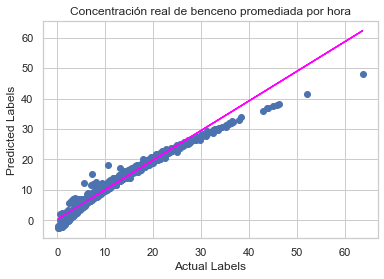

In [38]:
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Concentración real de benceno promediada por hora')
#superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [39]:
#Metricas de evaluación
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 1.6063452062180374
RMSE: 1.2674167452807452
R2: 0.9713056063057001


En este punto podemos responder a la pregunta planteada al inicio: **¿En que horarios se tiene la mayor contaminación del aire?**

Analizando los graficos obtenidos podemos determinar que a las 19:00 hrs es la hora más común en que los contaminantes alcanzan su punto más alto, por otra parte también a las 8:00 hrs se cuenta con un aumento, se les considera horas de entrada/salida de trabajo y clases, por lo que se hace mayor uso de coches particulares y transporte público, esto indica que cuando más se hace uso de estos es cuando los niveles de contaminación aumentan.

**Modelo de Regresión lineal**

Observando nuestro gráfico hay una tendencia diagonal definida, y las intersecciones de los valores predichos y reales siguen en general la trayectoria de la línea de tendencia, y con los valores obtenidos en nuestras métricas de evaluación, podemos concluir que es un buen modelo y que se obtiene un nivel de error bajo.